# Wave analysis with gamma = 0

[Index](../0-index.ipynb)

Here we investigate the wave properties when the recovery rate is $\gamma = 0$.

## Imports and global variables

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pathlib import Path
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mco
import matplotlib.gridspec as mgs
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from matplotlib import animation
plt.rcParams['svg.fonttype'] = 'none'

from IPython.display import HTML
from IPython.display import Image

In [3]:
import sys
sys.path.append('../../code')
from functions import wave_front_get_ode_sol

## Model
We consider the parametrization:
\begin{aligned}
S(x,t) &= F(x - x_0 - vt), \\
F(x) &= \frac{1}{2}\left(1 + \phi\left( \frac{2v}{\beta} x \right) \right),
\end{aligned}
of the number of susceptible individuals on a 1D lattice.

The function $\phi$ satisfies the ODE:
\begin{align}
\left\lbrace \begin{aligned}
\theta' &= - \frac{\theta}{1+\phi} + C (1-\phi) \\
\phi' &= \theta
\end{aligned}
\right.
\end{align}
with the initial condition $\theta(0) = C (1 - \phi(0)^2)$. We shall initialize $\phi(0) > -1$.

We also have the condition $0 < C < 1/16$.

Note that:
\begin{align}
C = \frac{\beta (\alpha + 4 \beta) \delta x^2}{4 v^2},
\end{align}
where $\delta x$ is the lattice spacing.

## Parameters

In [4]:
figdir = Path('..') / '..' / 'figures' / '7-wave_analysis' / '71-ode_gamma_eq0'
if not figdir.is_dir():
    figdir.mkdir(parents=True, exist_ok=True)

In [5]:
exts = ['.png', '.svg']
dpi=300

In [6]:
# parameters
p0 = -0.99
Cs = np.linspace(0,1./16,10+2)[1:-1]

## Resolution

In [7]:
X_list = []
Y_list = []
T_list = []

for C in Cs:
    T, X, Y = wave_front_get_ode_sol(C, D=0., p0=p0, tmax=1000, npts=1000)    
    T_list.append(T)
    X_list.append(X)
    Y_list.append(Y)

In [8]:
fig = plt.figure(figsize=(6,4.5))
ax = fig.gca()
for C, T, X in zip(Cs, T_list, X_list):
    ax.plot(T,X, label="C = {:.4f}".format(C))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(length=4)
ax.set_ylim(0,None)
# ax.set_yscale('log')
ax.set_xlim(0,None)
ax.set_xlabel('x', fontsize='large')
ax.set_ylabel('$\phi\'$', fontsize='x-large')
ax.legend(loc='best', frameon=False, fontsize='large')
fig.tight_layout()

fname = 'ode_solutions_phiprime'
for ext in exts:
    filepath = figdir / (fname + ext)
    fig.savefig(filepath, bbox_inches='tight', pad_inches=0, dpi=dpi)
    print("Written file: {:s}".format(str(filepath)))
fig.clf()
plt.close('all')

Written file: ../../figures/7-wave_analysis/71-ode_gamma_eq0/ode_solutions_phiprime.png
Written file: ../../figures/7-wave_analysis/71-ode_gamma_eq0/ode_solutions_phiprime.svg


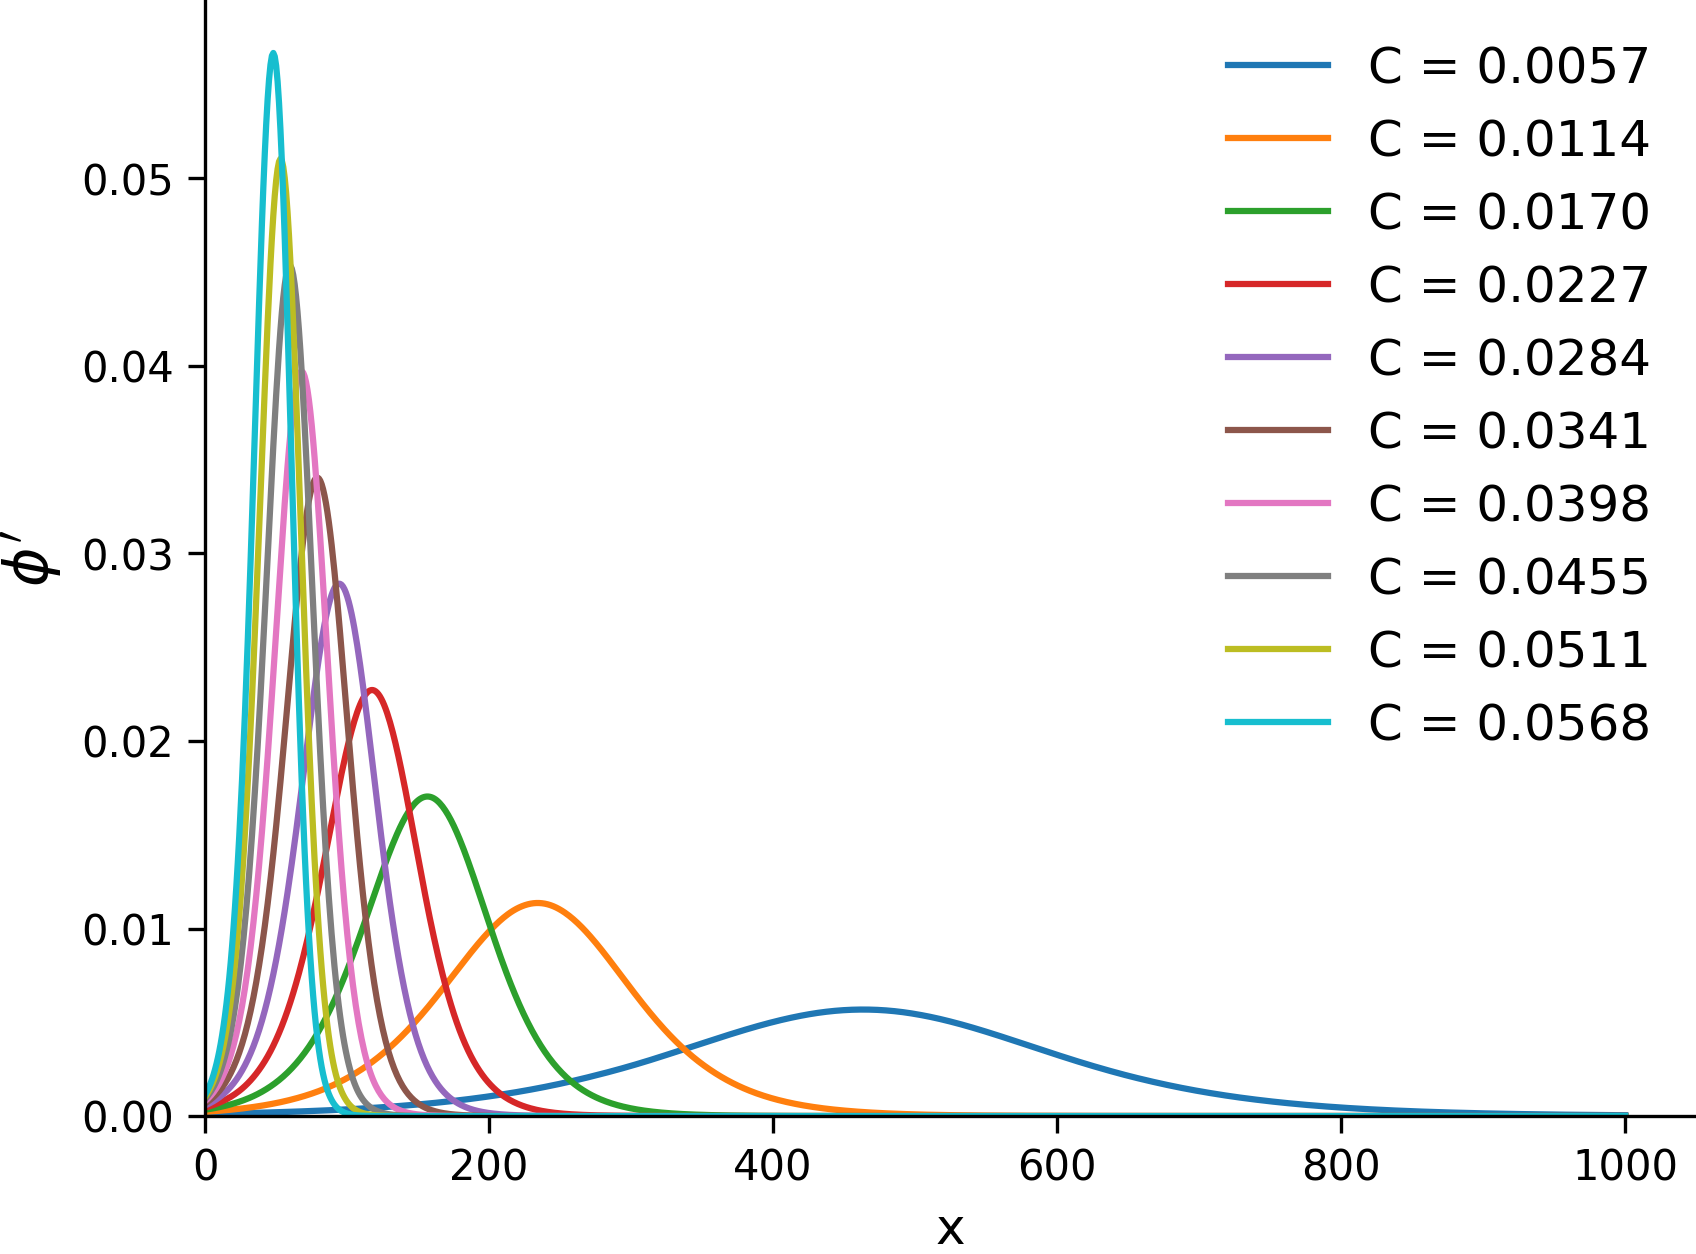

In [9]:
fname = 'ode_solutions_phiprime'
filepath = figdir / (fname + '.png')
Image(filename=filepath, width=4./3*360)

In [10]:
fig = plt.figure(figsize=(6,4.5))
ax = fig.gca()
for C, T, Y in zip(Cs, T_list, Y_list):
    ax.plot(T, Y, label="C = {:.4f}".format(C))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(length=4)
ax.set_ylim(-1,None)
ax.set_xlim(0,None)
ax.set_xlabel('x', fontsize='large')
ax.set_ylabel('$\phi$', fontsize='x-large')
ax.legend(loc='best', frameon=False, fontsize='large')
fig.tight_layout()

fname = 'ode_solutions_phi'
# fname = 'domega_tot'
for ext in exts:
    filepath = figdir / (fname + ext)
    fig.savefig(filepath, bbox_inches='tight', pad_inches=0, dpi=dpi)
    print("Written file: {:s}".format(str(filepath)))
fig.clf()
plt.close('all')

Written file: ../../figures/7-wave_analysis/71-ode_gamma_eq0/ode_solutions_phi.png
Written file: ../../figures/7-wave_analysis/71-ode_gamma_eq0/ode_solutions_phi.svg


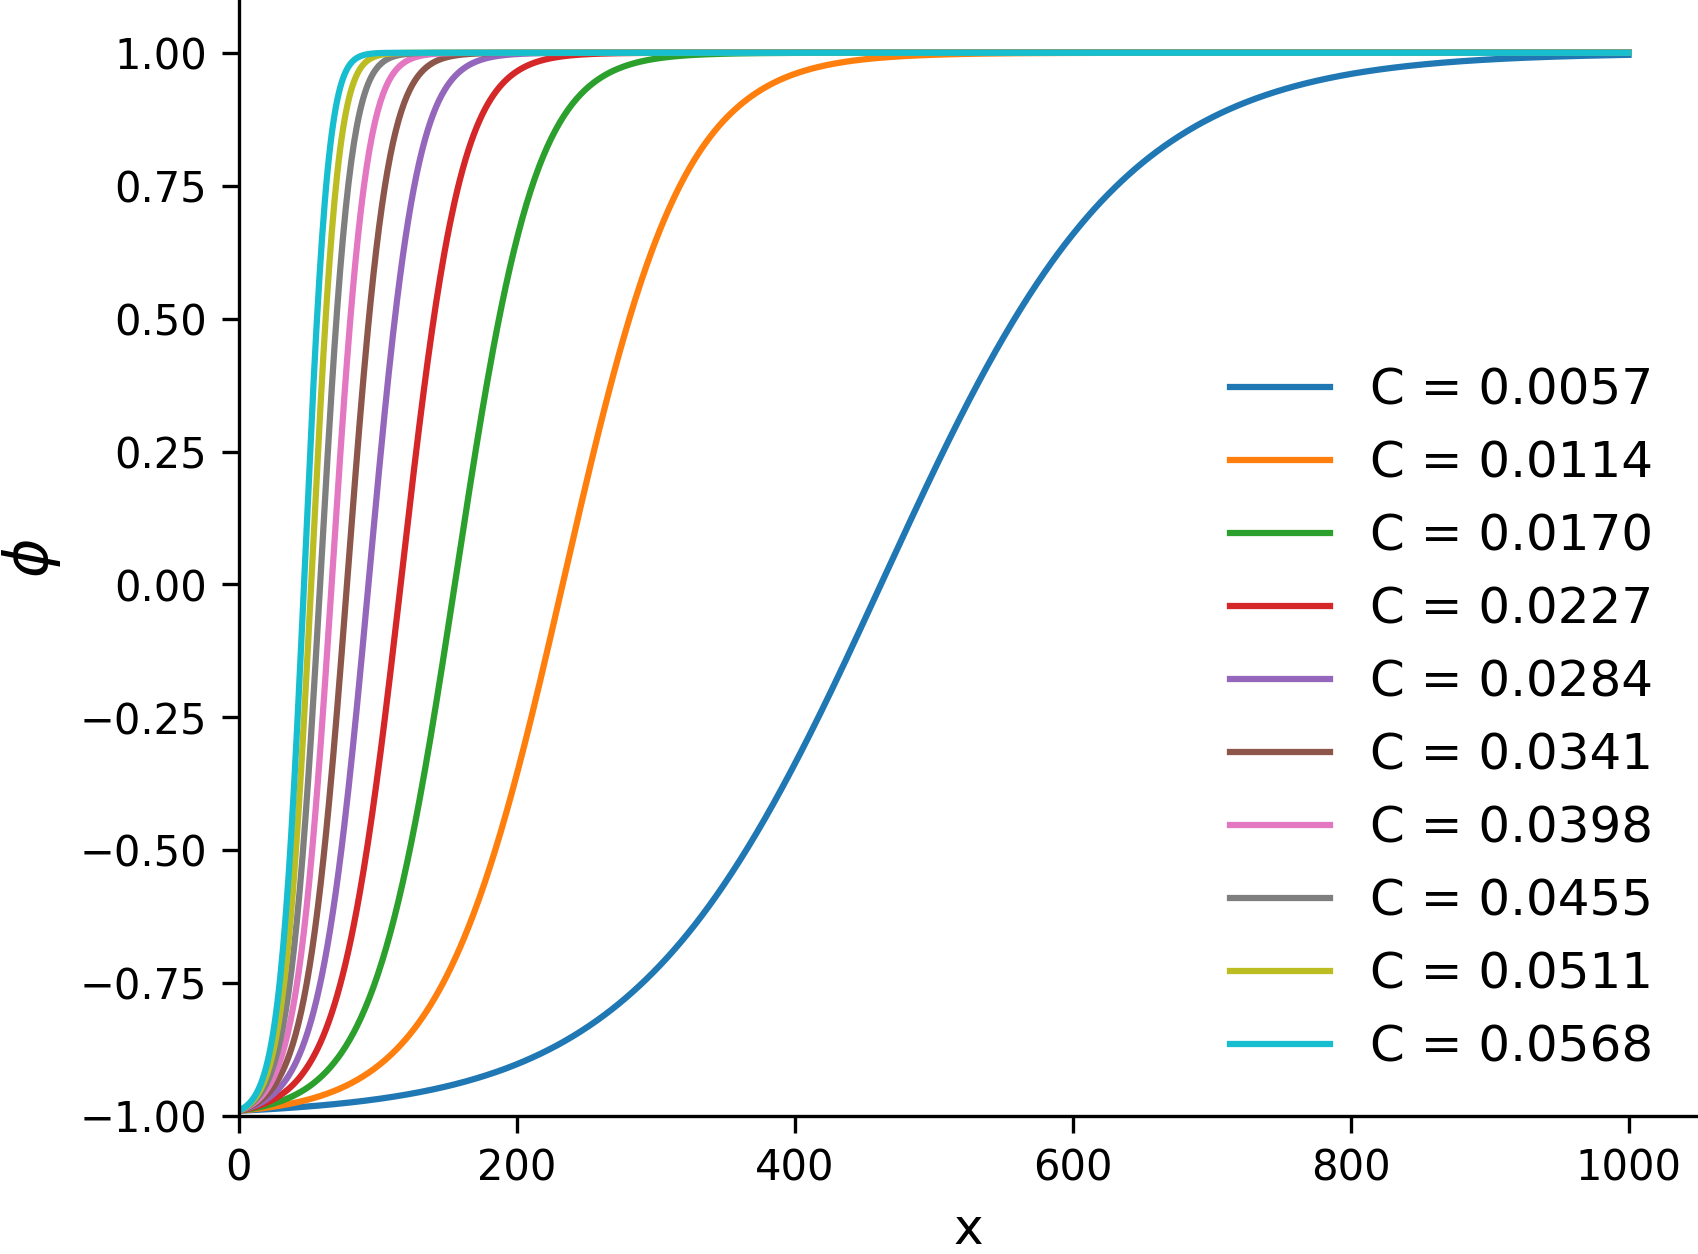

In [11]:
fname = 'ode_solutions_phi'
filepath = figdir / (fname + '.png')
Image(filename=filepath, width=4./3*360)

## Phase space exploration

In [12]:
C = 0.1
p0=-0.999

## Direct

In [13]:
T, X, Y = wave_front_get_ode_sol(C, D=0., p0=p0, tmax=100, npts=1000, x0_inf=1.0e-06)

In [14]:
fig = plt.figure(figsize=(4,3), dpi=300)
ax = fig.gca()
ax.plot(T, Y, '-', lw=1, color='darkblue', label='$\\phi(X)$')
ax.legend(loc='best')
ax.set_xlabel("X", fontsize='medium')
# ax.set_ylim(-1,1)
ax.set_xlim(0,None)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(length=4)

fname = 'sol_phi'
for ext in exts:
    filepath = figdir / (fname + ext)
    fig.savefig(filepath, bbox_inches='tight', pad_inches=0, dpi=dpi)
    print("Written file: {:s}".format(str(filepath)))
fig.clf()
plt.close('all')

Written file: ../../figures/7-wave_analysis/71-ode_gamma_eq0/sol_phi.png
Written file: ../../figures/7-wave_analysis/71-ode_gamma_eq0/sol_phi.svg


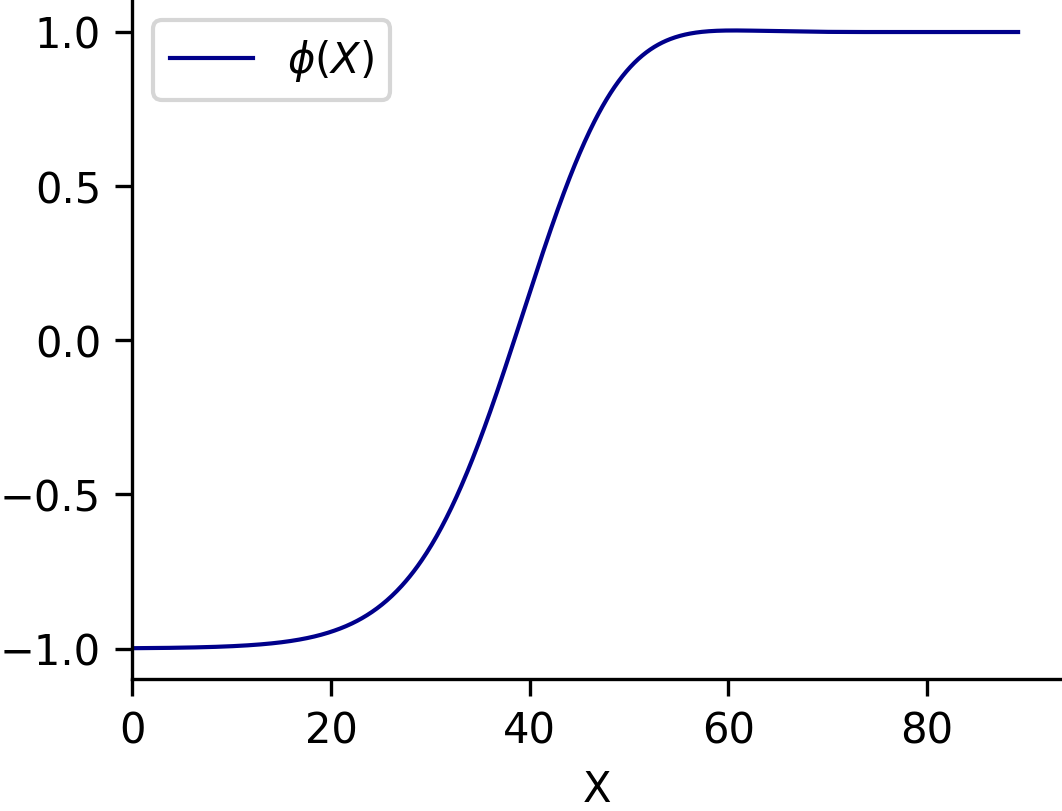

In [15]:
fname = 'sol_phi'
filepath = figdir / (fname + '.png')
Image(filename=filepath, width=4./3*360)

In [16]:
fig = plt.figure(figsize=(4,3), dpi=300)
ax = fig.gca()
ax.plot(T, X, '-', lw=1, color='darkblue', label='$\\theta(X)$')
ax.legend(loc='best')
ax.set_xlabel("X", fontsize='medium')
# ax.set_ylim(-1,1)
ax.set_xlim(0,None)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(length=4)

fname = 'sol_theta'
for ext in exts:
    filepath = figdir / (fname + ext)
    fig.savefig(filepath, bbox_inches='tight', pad_inches=0, dpi=dpi)
    print("Written file: {:s}".format(str(filepath)))
fig.clf()
plt.close('all')

Written file: ../../figures/7-wave_analysis/71-ode_gamma_eq0/sol_theta.png
Written file: ../../figures/7-wave_analysis/71-ode_gamma_eq0/sol_theta.svg


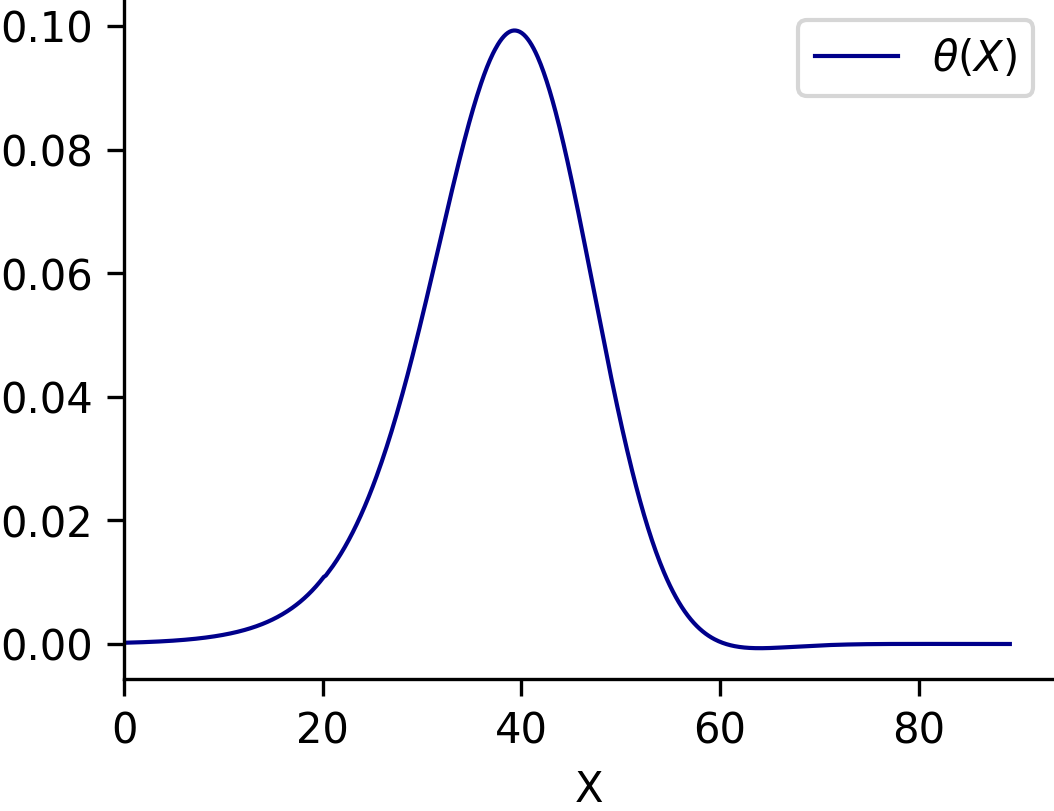

In [17]:
fname = 'sol_theta'
filepath = figdir / (fname + '.png')
Image(filename=filepath, width=4./3*360)

In [18]:
from functions import wave_ode_gamma_eq0 as func_ode

In [19]:
fig = plt.figure(figsize=(4,3), dpi=300)
ax = fig.gca()
xspace = np.linspace(0,2*C,20)
yspace = np.linspace(-1,1,21)[1:]
XX, YY = np.meshgrid(xspace, yspace)

args = [C]
F = func_ode(0, [XX,YY], *args)

Yr = np.linspace(yspace[0],yspace[-1],101)
Xr = C*(1-Yr**2)

ax.quiver(YY,XX,F[1],F[0])
ax.plot(Yr, Xr, 'r--', lw=1, label='$X = C (1-Y^2)$')
ax.plot(Y, X, '-', lw=1, color='darkblue', label='straight')
ax.set_xlabel("y", fontsize='large')
ax.set_ylabel("x", fontsize='large')
ax.set_xlim(-1,1)
ax.set_ylim(0,2*C)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(length=4)

ax.legend(loc='upper right', fontsize='small')

fname = 'ode_field'
for ext in exts:
    filepath = figdir / (fname + ext)
    fig.savefig(filepath, bbox_inches='tight', pad_inches=0, dpi=dpi)
    print("Written file: {:s}".format(str(filepath)))
fig.clf()
plt.close('all')

Written file: ../../figures/7-wave_analysis/71-ode_gamma_eq0/ode_field.png
Written file: ../../figures/7-wave_analysis/71-ode_gamma_eq0/ode_field.svg


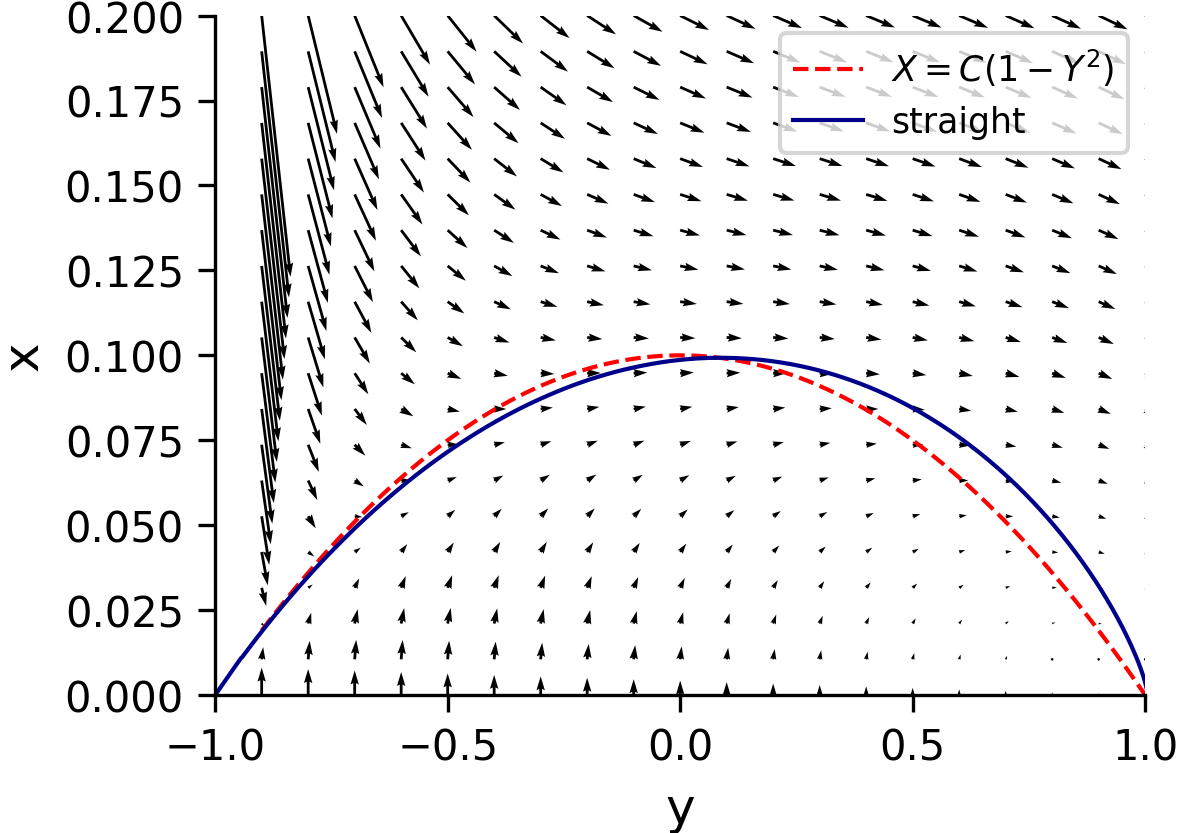

In [20]:
fname = 'ode_field'
filepath = figdir / (fname + '.png')
Image(filename=filepath, width=4./3*360)

In [21]:
from scipy.integrate import solve_ivp

In [22]:
method = 'BDF'
tmax = 100
fig = plt.figure(figsize=(4,3), dpi=300)
ax = fig.gca()
seed = 123
np.random.seed(123)
for i in range(300):
    q0 = np.random.rand()*2*C
    p0 = np.random.rand()*2 - 1.
    X0 = np.array([q0,p0])
    t, x, y = wave_front_get_ode_sol(C, D=0., p0=p0, X0=X0, tmax=100, npts=1000, x0_inf=1.0e-06)
    
    ax.plot(y, x, '-', lw=0.5, color='darkblue')
ax.set_xlabel("y", fontsize='large')
ax.set_ylabel("x", fontsize='large')
ax.set_xlim(-1,1)
ax.set_ylim(0,2*C)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(length=4)
# ax.legend(loc='upper right', fontsize='large')

fname = 'ode_trajectories'
for ext in exts:
    filepath = figdir / (fname + ext)
    fig.savefig(filepath, bbox_inches='tight', pad_inches=0, dpi=dpi)
    print("Written file: {:s}".format(str(filepath)))
fig.clf()
plt.close('all')

Written file: ../../figures/7-wave_analysis/71-ode_gamma_eq0/ode_trajectories.png
Written file: ../../figures/7-wave_analysis/71-ode_gamma_eq0/ode_trajectories.svg


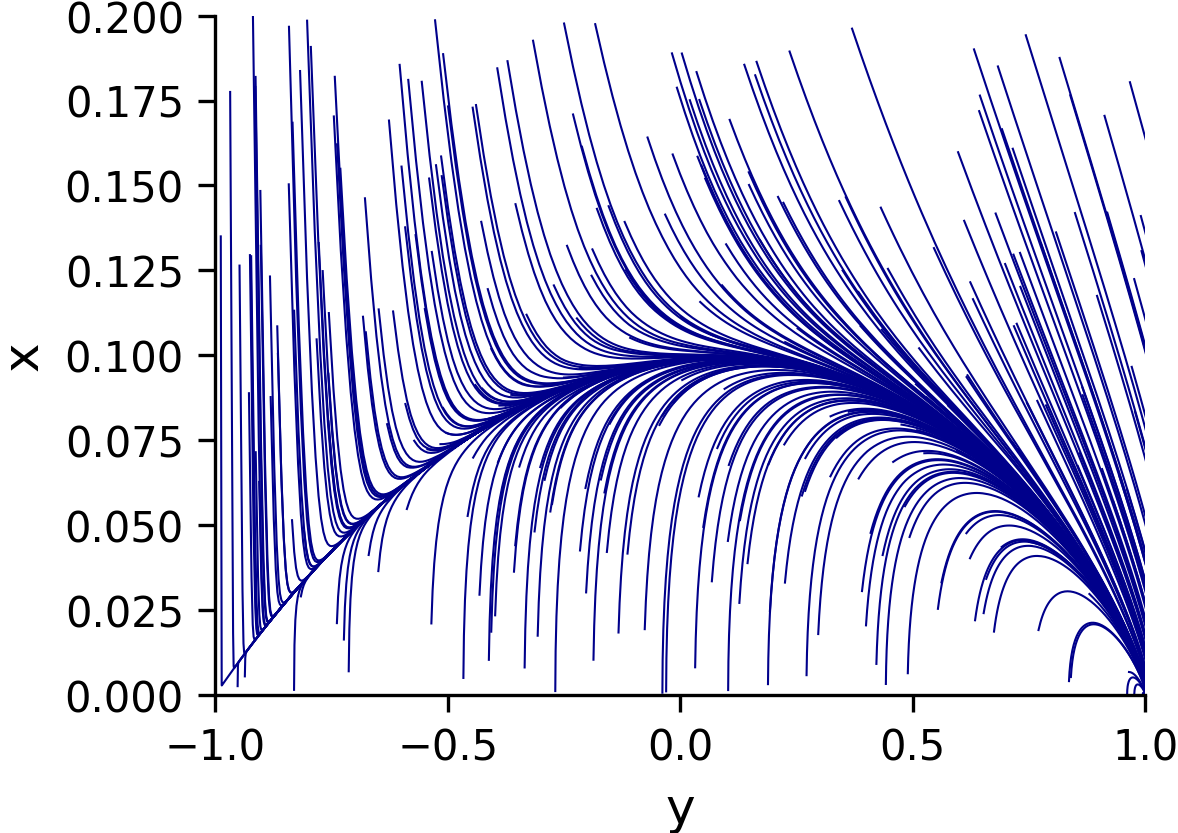

In [23]:
fname = 'ode_trajectories'
filepath = figdir / (fname + '.png')
Image(filename=filepath, width=4./3*360)